In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("indian startup_funding.csv")

In [ ]:
df.head()

,ï»¿Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJUâS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [ ]:
df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2367,2367,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
2368,2368,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
2369,2369,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
2370,2370,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31-01-2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [144]:
df.describe()

,SNo,AmountInUSD,Month,Year,MY
count,2372.000000,1.525000e+03,2372.000000,2372.000000,2372.000000
mean,1185.500000,1.203107e+07,6.266863,2015.792159,201585.482715
std,684.881742,6.403118e+07,3.408630,0.733754,72.876670
min,0.000000,1.600000e+04,1.000000,2015.000000,201501.000000
25%,592.750000,3.700000e+05,3.000000,2015.000000,201508.000000
50%,1185.500000,1.070000e+06,6.000000,2016.000000,201603.000000
75%,1778.250000,6.000000e+06,9.000000,2016.000000,201611.000000
max,2371.000000,1.400000e+09,12.000000,2017.000000,201712.000000


In [143]:
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'

<ipython-input-143-46e3e1b803df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
<ipython-input-143-46e3e1b803df>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
<ipython-input-143-46e3e1b803df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
<ipython-input-143-46e3e1b803df>:3: UserWarning: Parsing dates in DD/MM/YYYY f

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
import re
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['MY'] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

In [ ]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Month,Year,MY
0,0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN,1,2017,201701
1,1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2,2017,201702
2,2,2017-02-08,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2,2017,201702
3,3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN,2,2017,201702
4,4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN,2,2017,201702


In [ ]:
totalStartupCount = sum(df['StartupName'].value_counts())
print("Total Number of startUps:", totalStartupCount)

Total Number of startUps: 2372


****EDA on this dataset****

In [ ]:
#checking first in which year how many funding is received by all startups together
yearCount = df['Year'].value_counts()
print(yearCount)

2016    993
2015    936
2017    443
Name: Year, dtype: int64


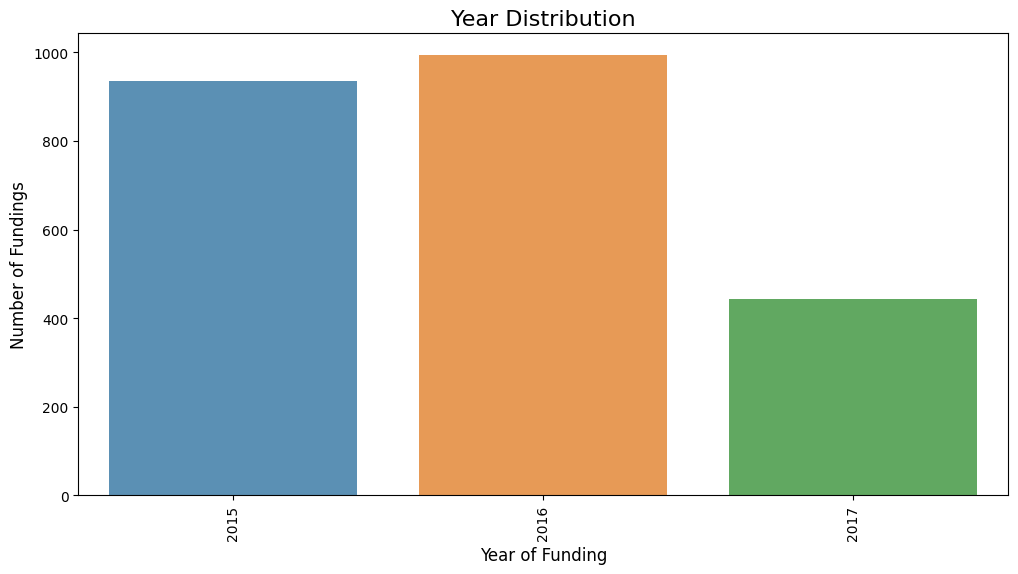

In [102]:
plt.figure(figsize=(12,6))
sns.barplot(x=yearCount.index, y=yearCount.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Year of Funding', fontsize=12)
plt.ylabel('Number of Fundings', fontsize=12)
plt.title("Year Distribution", fontsize=16)
plt.show()

EDA-Report:1

```
``-> Startup boom was maximum in 2016 which was increased from 2015.
-> startup boom was gradually decreased/dropped in 2017.
```



In [103]:
monthCounts = df['Month'].value_counts()
print(monthCounts)

1     232
6     232
4     215
3     210
7     207
8     199
2     184
5     184
10    183
9     182
11    174
12    170
Name: Month, dtype: int64


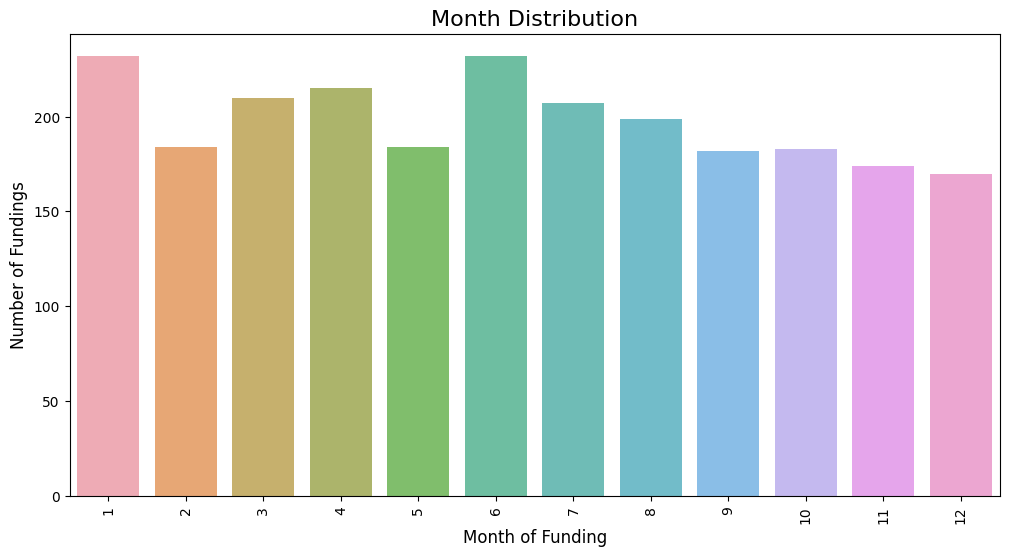

In [105]:
plt.figure(figsize=(12,6))
sns.barplot(x=monthCounts.index,y= monthCounts.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month of Funding', fontsize=12)
plt.ylabel('Number of Fundings', fontsize=12)
plt.title("Month Distribution", fontsize=16)
plt.show()

EDA-Report:2


```
`-> Funding occurs around the year.
-> But still we can say maximum funding is done at starting and mid of the year`

```





In [107]:
monthYearCount = df['MY'].value_counts()
print(monthYearCount)

201604    102
201601    100
201509     98
201608     95
201507     94
201606     93
201511     89
201503     85
201508     83
201506     82
201510     82
201612     82
201610     81
201602     81
201611     75
201607     72
201609     72
201605     70
201501     70
201603     70
201505     67
201512     66
201504     66
201701     62
201706     57
201703     55
201502     54
201702     49
201705     47
201704     47
201707     41
201712     22
201708     21
201710     20
201709     12
201711     10
Name: MY, dtype: int64


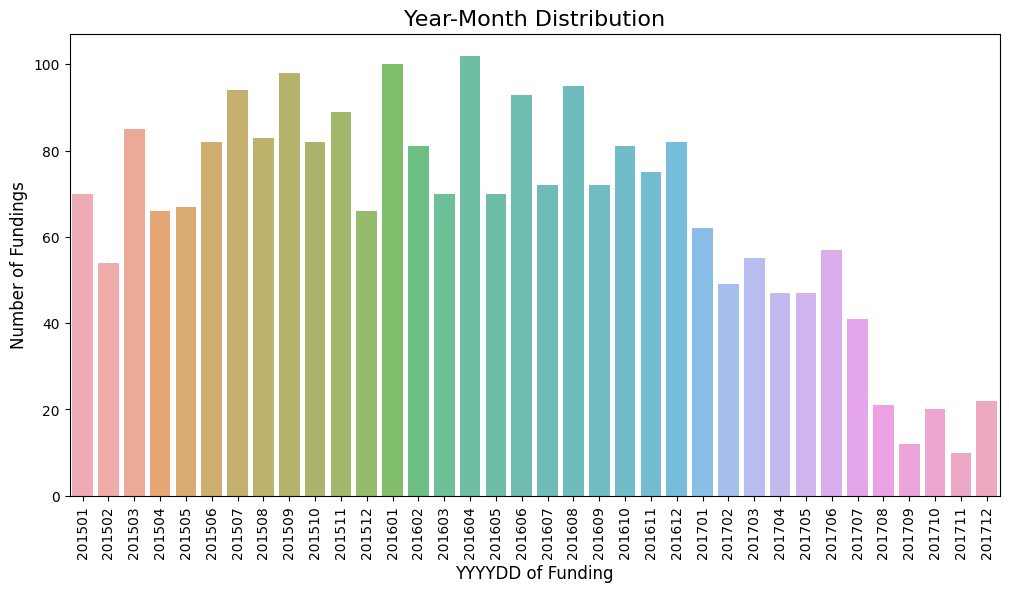

In [109]:
plt.figure(figsize=(12,6))
sns.barplot(x=monthYearCount.index,y=monthYearCount.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('YYYYDD of Funding', fontsize=12)
plt.ylabel('Number of Fundings', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

EDA-Report:3

```
-> We can see that high number of concentration of funding is seen between 201506/Mid 2015 AND 201609/ after Mid 2016
-> After Mid of 2016 funding has been decreased.
```



In [110]:
# In which location higest startup
cityCount = df['CityLocation'].value_counts()[:10]
print(cityCount)

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64


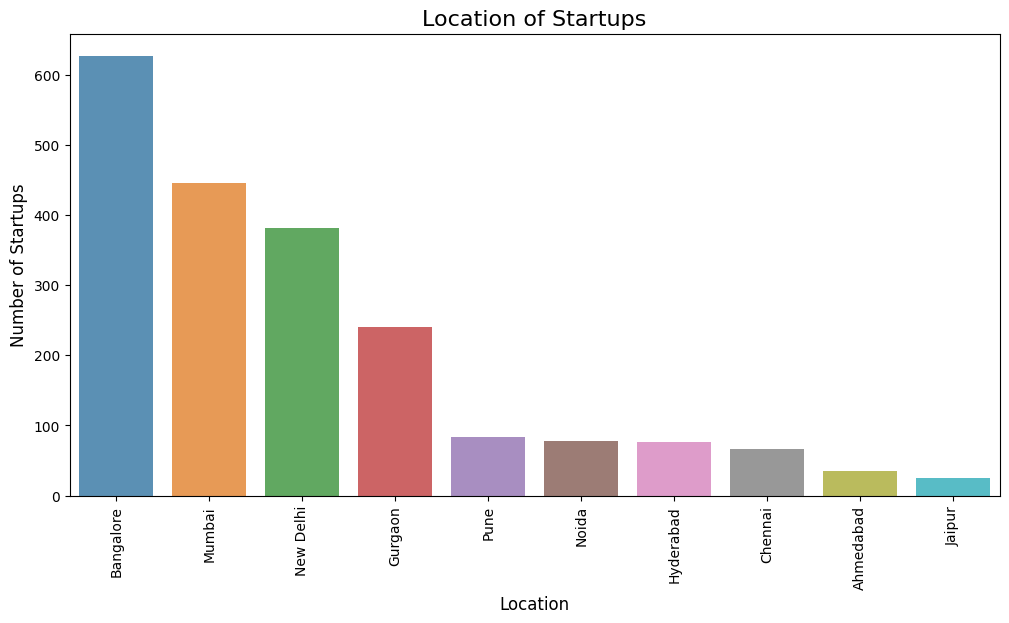

In [112]:
plt.figure(figsize=(12,6))
sns.barplot(x=cityCount.index,y=cityCount.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.title("Location of Startups", fontsize=16)
plt.show()

EDA-Report:4


```
`-> We can see here that Banglore the electronic city of india is hot favourite for startups
-> Difference between Banglore and Mumbai is having huge number of difference compare to difference between other cities
```



In [113]:
df['InvestmentType'][df['InvestmentType']=='SeedFunding'] = 'Seed Funding'
df['InvestmentType'][df['InvestmentType']=='PrivateEquity'] = 'Private Equity'
df['InvestmentType'][df['InvestmentType']=='Crowd funding'] = 'Crowd Funding'
investTypes = df['InvestmentType'].value_counts()
print(investTypes)

Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: InvestmentType, dtype: int64


<ipython-input-113-ddc21f685534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvestmentType'][df['InvestmentType']=='SeedFunding'] = 'Seed Funding'
<ipython-input-113-ddc21f685534>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvestmentType'][df['InvestmentType']=='PrivateEquity'] = 'Private Equity'
<ipython-input-113-ddc21f685534>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvestmentType'][df['InvestmentType

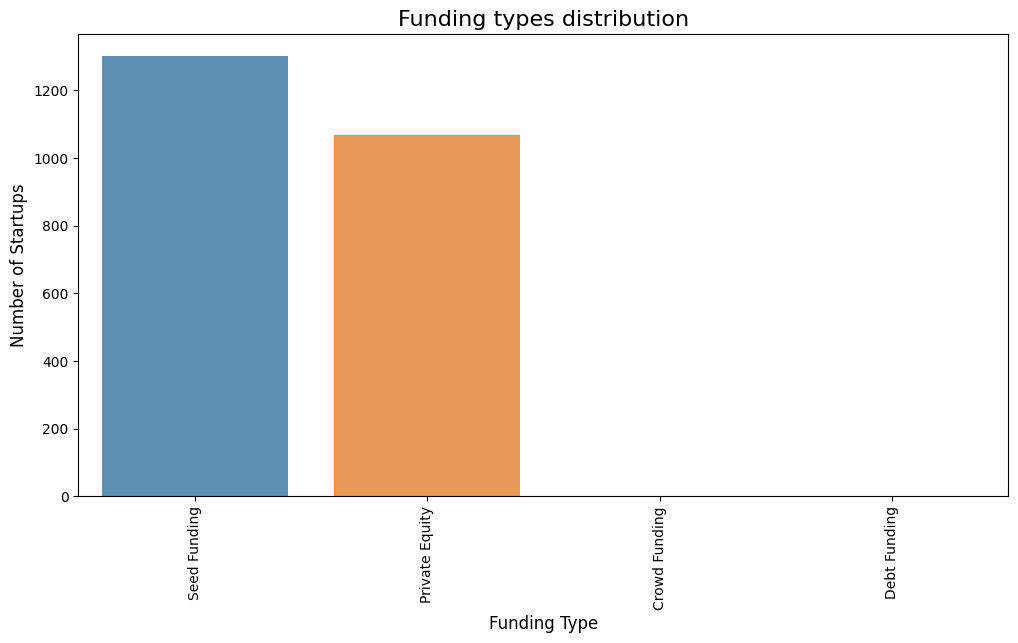

In [115]:
plt.figure(figsize=(12,6))
sns.barplot(x=investTypes.index,y=investTypes.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Funding Type', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.title("Funding types distribution", fontsize=16)
plt.show()

EDA-Report:5


```
`-> Seed Funding and Private Equity funding are the two major funding types of investment in startups `
```



In [117]:
investorCounts = df['InvestorsName'].value_counts()[:10]
print(investorCounts)

Undisclosed Investors       33
Undisclosed investors       27
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
Brand Capital               10
Undisclosed Investor        10
Name: InvestorsName, dtype: int64


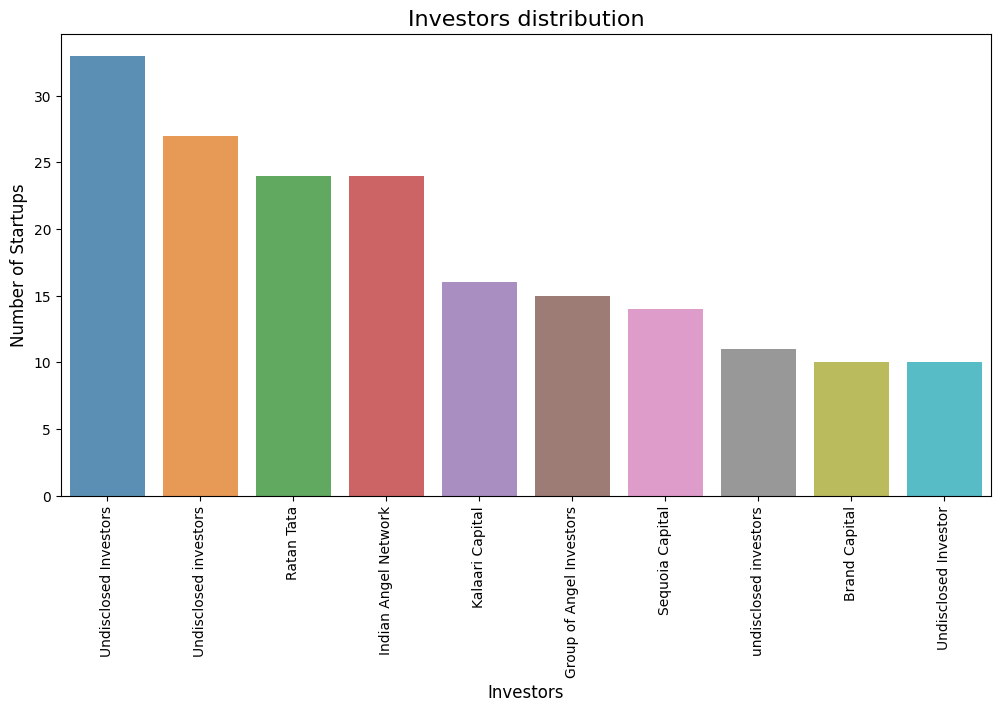

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(x=investorCounts.index,y=investorCounts.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Investors', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.title("Investors distribution", fontsize=16)
plt.show()



```
# We have some ambiguity here in name 'Undisclosed Investors' we need to remove this duplication from our dataset we'll process this attribute and make all 'Undisclosed Investors' as same
```



In [121]:
i = 0
for investor in df['InvestorsName']:
    print(investor)
    if(i==10):
        break
    i += 1

Kae Capital
Triton Investment Advisors
Kashyap Deorah, Anand Sankeshwar, Deepak Jain, Sadashiva NT, Arjun Mehta, Satish Kaul, Anindya Ghose
Kunal Shah, LetsVenture, Anupam Mittal, Hetal Sonpal
Narottam Thudi, Shireesh Palle
Reliance Corporate Advisory Services Ltd
Infuse Ventures, JLL
Asset Management (Asia) Ltd, Digital Garage Inc
Kalaari Capital, Nexus India Capital Advisors
International Finance Corporation, Rocketship, Accel Partners, Jungle Ventures, Shailesh Rao, Venture Highway
BCCL


In [122]:
investorNames = []
for investor in df['InvestorsName']:
    for inv in str(investor).split(","):
        if inv != "":
            investorNames.append(inv.strip().lower())

startUpInvestors = pd.Series(investorNames).value_counts()[:20]
print(startUpInvestors)

undisclosed investors       73
sequoia capital             64
accel partners              53
kalaari capital             44
saif partners               43
indian angel network        41
blume ventures              40
ratan tata                  30
rajan anandan               25
tiger global                25
nexus venture partners      25
kae capital                 23
idg ventures                23
undisclosed investor        22
india quotient              21
group of angel investors    20
500 startups                20
anupam mittal               18
matrix partners             18
letsventure                 17
dtype: int64


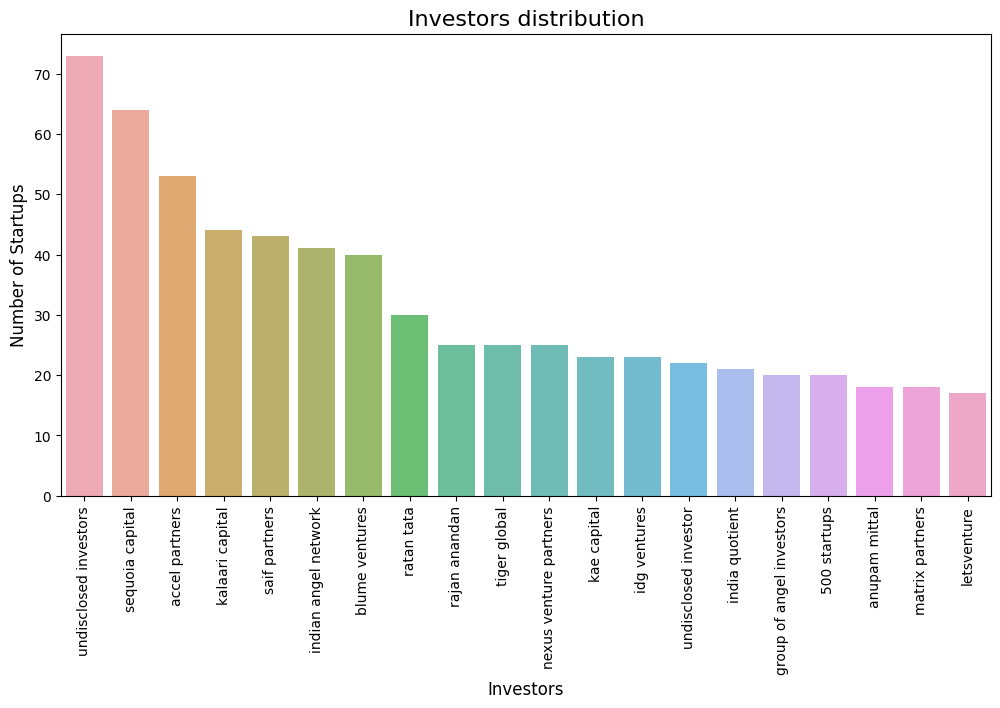

In [124]:
plt.figure(figsize=(12,6))
sns.barplot(x= startUpInvestors.index, y= startUpInvestors.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Investors', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.title("Investors distribution", fontsize=16)
plt.show()


EDA-Report:6
```
`-> Large number of the startup's funding is confidential
-> As far as we know that 'Sequoia capital' the investor who has done large number of investments
-> So New founders of startup target 'Sequoia Capital' to get investment for thier startup`
```



In [125]:
df['IndustryVertical'][df['IndustryVertical']=='eCommerce'] = 'ECommerce'
industryCounts = df['IndustryVertical'].value_counts()[:15]
print(industryCounts)

Consumer Internet               772
Technology                      313
ECommerce                       224
Healthcare                       30
Logistics                        24
Education                        20
Food & Beverage                  19
Finance                           9
Others                            6
Online Education Platform         5
Online Food Delivery              5
Real Estate                       4
Hyperlocal Handyman Services      3
FMCG                              3
Food Delivery Platform            3
Name: IndustryVertical, dtype: int64


<ipython-input-125-f6753b38cd24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IndustryVertical'][df['IndustryVertical']=='eCommerce'] = 'ECommerce'


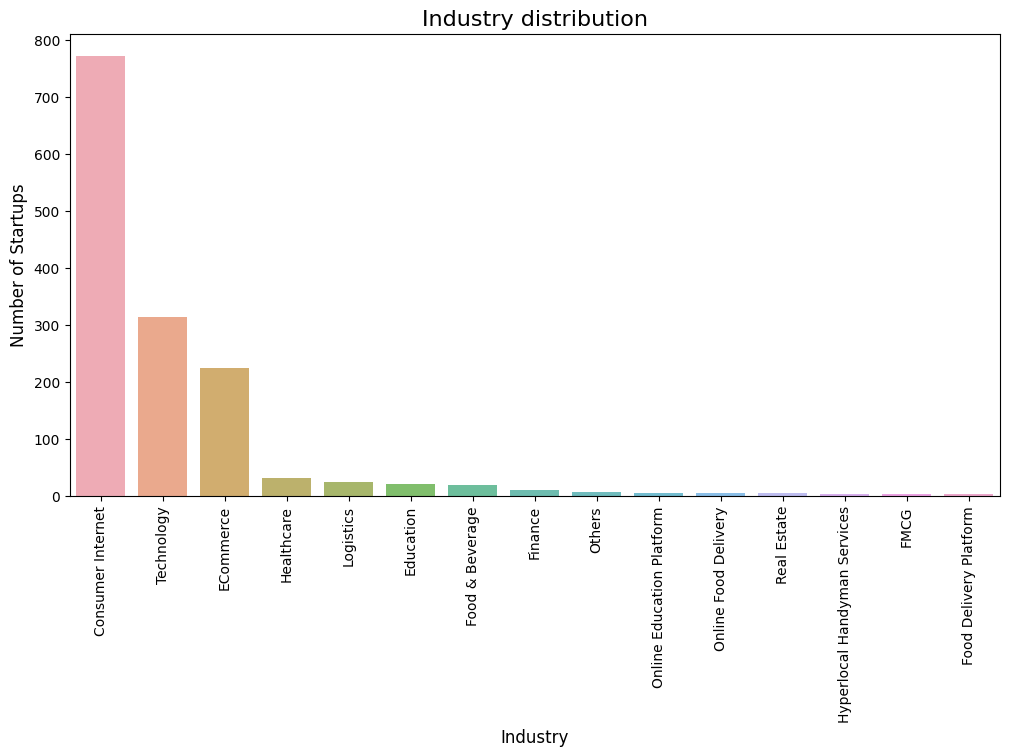

In [126]:
plt.figure(figsize=(12,6))
sns.barplot(x=industryCounts.index, y=industryCounts.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.title("Industry distribution", fontsize=16)
plt.show()

EDA-Report:7


```
-> Majority of startups are working in 'Consumer Internet'
-> 2nd heighest that is 'technology' some startups interested in developing technologies
```



In [127]:
subVerticalCounts = df['SubVertical'].value_counts()[:5]
print(subVerticalCounts)

Online Pharmacy             9
Food Delivery Platform      8
Online lending platform     5
Online Learning Platform    4
ECommerce Marketplace       3
Name: SubVertical, dtype: int64


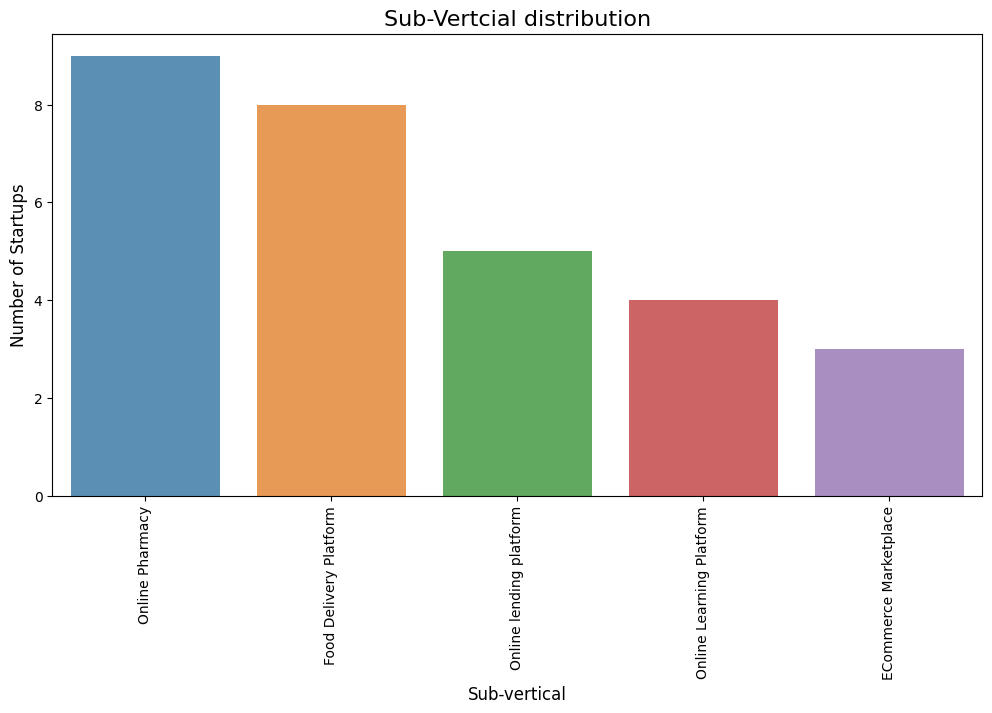

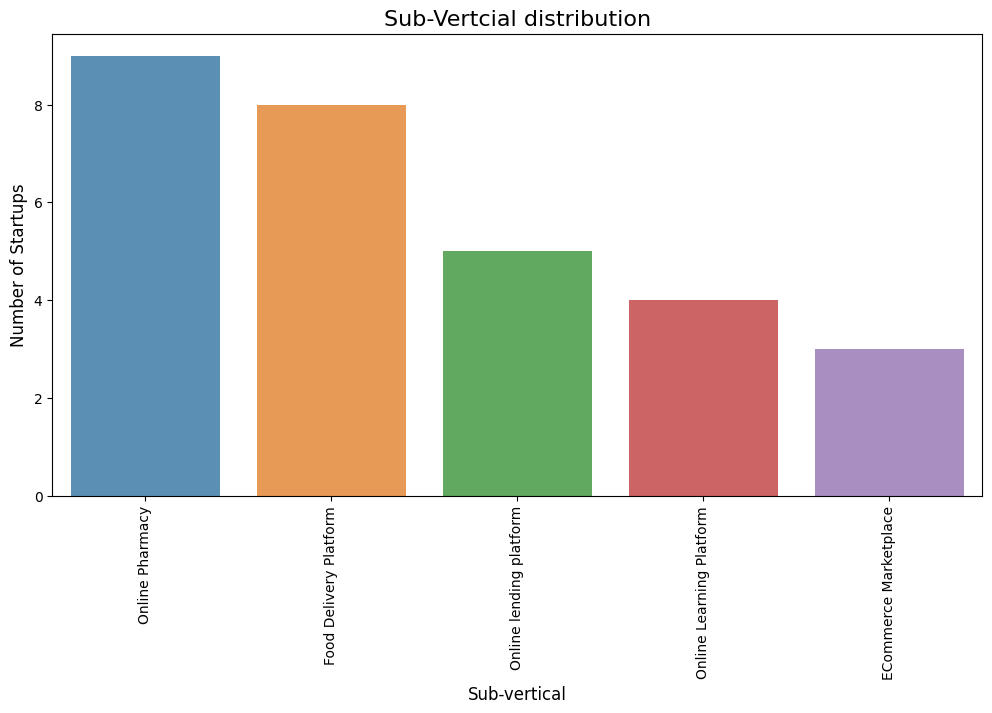

In [129]:
plt.figure(figsize=(12,6))
sns.barplot(x=subVerticalCounts.index, y=subVerticalCounts.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Sub-vertical', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.title("Sub-Vertcial distribution", fontsize=16)
plt.show()

EDA-Report:8


```
`-> Online Pharmacy is the main concentartion followed by Food Delivery platform for new startups`
```



In [133]:
df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df["AmountInUSD"] = pd.to_numeric(df["AmountInUSD"])
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Month,Year,MY
0,0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN,1,2017,201701
1,1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2,2017,201702
2,2,2017-02-08,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2,2017,201702
3,3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN,2,2017,201702
4,4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN,2,2017,201702


In [131]:
# highest amount of funding a startup
highestFund = df['AmountInUSD'].max()
print("Highest Funding amount is:", highestFund)

Highest Funding amount is: 1400000000.0


In [135]:
#which company received Highest fund
print("Highest Fund Receivers\n")
df[df['AmountInUSD'] == highestFund]

Highest Fund Receivers



,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Month,Year,MY
158,158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,NaN,5,2017,201705
294,294,2017-03-21,Flipkart,ECommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,NaN,3,2017,201703


In [137]:
# As we know Paytm and Flipkart are the Highest Fund receiver
df[df.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Month,Year,MY
158,158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,NaN,5,2017,201705
821,821,2016-08-30,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,NaN,8,2016,201608
1787,1787,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,Late Stage (Alibaba @ 40% equity),9,2015,201509
2218,2218,2015-03-13,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,More details,3,2015,201503
2276,2276,2015-05-02,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN,Strategic Investment (25% stake),5,2015,201505


In [138]:
df[df.StartupName == 'Flipkart']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Month,Year,MY
101,101,2017-06-26,Flipkart,ECommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,NaN,6,2017,201706
294,294,2017-03-21,Flipkart,ECommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,NaN,3,2017,201703
360,360,2017-02-20,Flipkart,ECommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,NaN,2,2017,201702
2017,2017,2015-04-06,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,Late Stage,4,2015,201504


EDA-Report:9


```
`-> Flipkart and Paytm are the two startups which received highest funds in India`
```



In [139]:
# Lowest amount of funding a startup
lowestFund = df['AmountInUSD'].min()
print("Lowest Funding amount is:", lowestFund)

Lowest Funding amount is: 16000.0


In [141]:
#which company received lowest fund
print("Lowest Fund Receivers\n")
df[df['AmountInUSD'] == lowestFund]

Lowest Fund Receivers



,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Month,Year,MY
2345,2345,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,201501
2346,2346,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,201501
2347,2347,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,201501
2348,2348,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,201501
2349,2349,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,201501


EDA-Report:10


```
-> Hostel Dunia, Play your sport, Enabli, CBS are the 5 startups which received lowest funds in India
```



In [142]:
# average funding received by startup
print("Average Indian startups received funding of : ",df["AmountInUSD"].dropna().sort_values().mean())

Average Indian startups received funding of :  12031073.099016393


EDA-Report:11


```
`-> Average Indian startups received funding of :  12031073.099`
```



**Conclusion of EDA**

1. **Year 2016** was most hapening time for the startups. The startup boom was emerged in **2015** and increased in 2016. But due demonetization of in Nov **2016** starup boom was imapcted and gradually decreased in 2017.

2. **Banglore** the electronic city of india is hot favourite for startups followed by**Mumbai** and **New Delhi**.

3. **Seed Funding**and **Private Equity** funding are the two major funding types of investment in startups

4. Large number of the startup's funding is **confidential-undisclosed**. But as far as we know that **Sequoia capital** has invested in many startups. So New founders of startup target 'Sequoia Capital' to get investment for their startup.

5. Majority of startups are working in **Consumer Internet**,
2nd heighest that is **Technology** some startups interested in developing new technologies

6. **Online Pharmacy** is the main concentartion followed by **Food Delivery platform** for new startups

7. **Flipkart** and **Paytm** are the two startups which received highest funds of amount**1400000000 USD** each.

8. **Hostel Dunia**, **Play your sport, Enabli**, **CBS** are the 5 startups which received lowest funds of amount 16000 USD

9. Average Indian startups received funding of : **12031073 USD**

```

```

